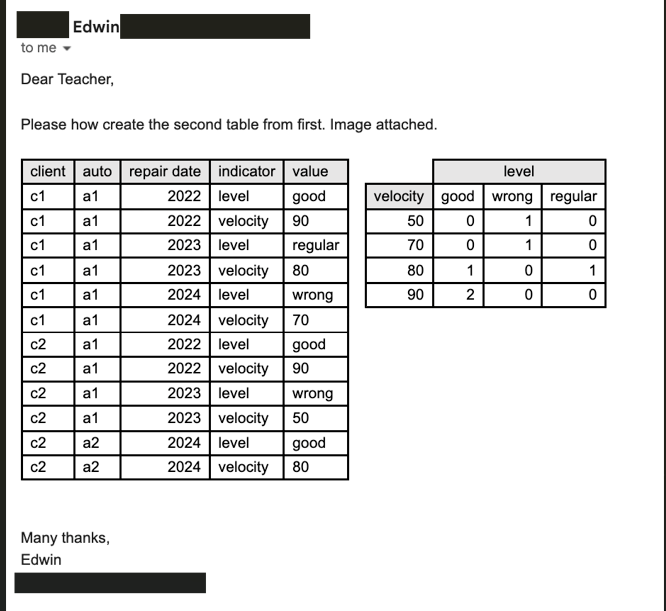

In [1]:
import pandas as pd
# Define the data as a list of tuples
auto_repair_data = [
    ('c1', 'a1', 2022, 'level', 'good'),
    ('c1', 'a1', 2022, 'velocity', '90'),
    ('c1', 'a1', 2023, 'level', 'regular'),
    ('c1', 'a1', 2023, 'velocity', '80'),
    ('c1', 'a1', 2024, 'level', 'wrong'),
    ('c1', 'a1', 2024, 'velocity', '70'),
    ('c2', 'a1', 2022, 'level', 'good'),
    ('c2', 'a1', 2022, 'velocity', '90'),
    ('c2', 'a1', 2023, 'level', 'wrong'),
    ('c2', 'a1', 2023, 'velocity', '50'),
    ('c2', 'a2', 2024, 'level', 'good'),
    ('c2', 'a2', 2024, 'velocity', '80')
]

# Create a DataFrame from the list
df = pd.DataFrame(auto_repair_data, columns=['customer_id', 'auto_id', 'year', 'indicator', 'value'])

# Print the DataFrame
print(df)



   customer_id auto_id  year indicator    value
0           c1      a1  2022     level     good
1           c1      a1  2022  velocity       90
2           c1      a1  2023     level  regular
3           c1      a1  2023  velocity       80
4           c1      a1  2024     level    wrong
5           c1      a1  2024  velocity       70
6           c2      a1  2022     level     good
7           c2      a1  2022  velocity       90
8           c2      a1  2023     level    wrong
9           c2      a1  2023  velocity       50
10          c2      a2  2024     level     good
11          c2      a2  2024  velocity       80


In [6]:

df = df[["indicator","value"]].copy()
df

,indicator,value
0,level,good
1,velocity,90
2,level,regular
3,velocity,80
4,level,wrong
5,velocity,70
6,level,good
7,velocity,90
8,level,wrong
9,velocity,50


In [9]:
level = []
velocity = []

# Iterate over the DataFrame rows
for i in range(0, len(df), 2):  # We increment by 2 to get each level-velocity pair
    level.append(df.iloc[i]['value'])
    velocity.append(df.iloc[i+1]['value'])

# Create the new DataFrame
new_df = pd.DataFrame({
    'level': level,
    'velocity': velocity
})

# Print the new DataFrame
print(new_df)

     level velocity
0     good       90
1  regular       80
2    wrong       70
3     good       90
4    wrong       50
5     good       80


In [13]:
# Pivot the DataFrame to get velocity as index and level as columns with count as values
pivot_df = new_df.groupby(['velocity', 'level']).size().unstack(fill_value=0)

# Print the pivoted DataFrame
print(pivot_df)


level     good  regular  wrong
velocity                      
50           0        0      1
70           0        0      1
80           1        1      0
90           2        0      0
